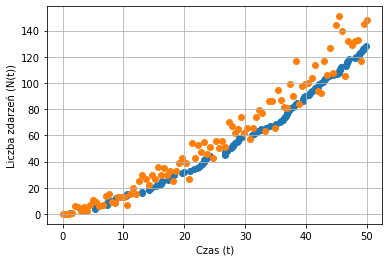

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def lambda_function(t):
    return t**(1/3)

def m(t, lambda_function):
    return quad(lambda_function, 0, t)[0]

def Poiss(m):
    U = np.random.uniform(0,1)
    j=0
    p = np.exp(-m)
    F = p
    while U > F:
        p = (p * m) / (j+1)
        F += p
        j += 1
    return j

def niejednorodny_poiss(T):
    Nt = Poiss(m(T, lambda_function))
    S=[]
    I=0
    for _ in range(Nt):
        U=np.random.uniform(0,1)
        t = T * (U ** (2/3))
        I += 1
        S.append(t)
    return sorted(S), I
    
T=50
t_values = np.linspace(0, T, 100)

S, I = niejednorodny_poiss(T)

t_values = np.linspace(0, T, 100)
poisson= [Poiss(quad(lambda_function, 0, t)[0]) for t in t_values]

plt.scatter(S,range(len(S)))
plt.scatter(t_values, poisson)
plt.xlabel('Czas (t)')
plt.ylabel('Liczba zdarzeń (N(t))')
plt.grid(True)
plt.show()